In [1]:
import uproot

In [2]:
file = uproot.open(
    "../ffNtuple_2Mu2E_500_1p2_9p6.root"
)
file.classnames()

{'ffNtuplizer;1': 'TDirectory',
 'ffNtuplizer/ffNtuple;9': 'TTree',
 'ffNtuplizer/ffNtuple;8': 'TTree',
 'ffNtupleStat;1': 'TDirectory',
 'ffNtupleStat/history;1': 'TH1D',
 'ffNtupleStat/pileup;1': 'TH1D',
 'ffNtupleStat/trigger;1': 'TH1D',
 'ffNtupleStat/runlumi;1': 'TTree',
 'ffNtupleStat/weight;1': 'TTree'}

In [3]:
tree = file['ffNtuplizer/ffNtuple;9']
branches = tree.arrays()

branch1 = tree['electron_p4/electron_p4.fCoordinates.fX'].array()
branch2 = tree['electron_p4/electron_p4.fCoordinates.fY'].array()
branch3 = tree['electron_p4/electron_p4.fCoordinates.fZ'].array()
branch4 = tree['electron_p4/electron_p4.fCoordinates.fT'].array()

In [4]:
import vector
muon_p4 = vector.zip({"px": branches['muon_p4.fCoordinates.fX'], 
                      "py": branches['muon_p4.fCoordinates.fY'], 
                      "pz": branches['muon_p4.fCoordinates.fZ'], 
                      "t": branches['muon_p4.fCoordinates.fT']}  )

electron_p4 = vector.zip({"px": branch1, 
                          "py": branch2, 
                          "pz": branch3, 
                          "t": branch4}  )

This code is defining muon_p4 and electron_p4 as vectors. They both represent the amount of muons and electrons present in each event.

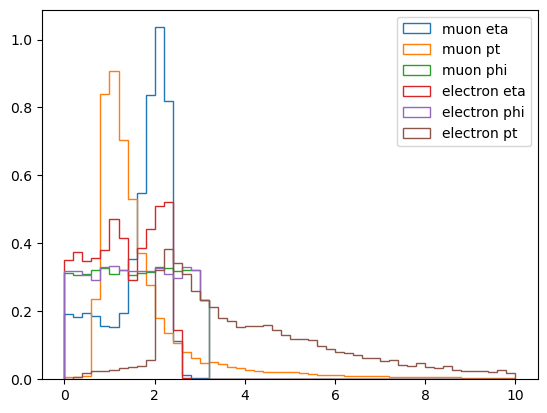

In [5]:
import matplotlib.pyplot as plt
import awkward as ak

plt.hist(ak.flatten(muon_p4.eta), bins=50, range=(0, 10),histtype='step',label="muon eta", density=True)
plt.hist(ak.flatten(muon_p4.pt), bins=50, range=(0, 10),histtype='step',label="muon pt", density=True)
plt.hist(ak.flatten(muon_p4.phi), bins=50, range=(0, 10),histtype='step',label="muon phi", density=True)
plt.hist(ak.flatten(electron_p4.eta), bins=50, range=(0, 10),histtype='step',label="electron eta", density=True)
plt.hist(ak.flatten(electron_p4.phi), bins=50, range=(0, 10),histtype='step',label="electron phi", density=True)
plt.hist(ak.flatten(electron_p4.pt), bins=50, range=(0, 10),histtype='step',label="electron pt", density=True)
plt.legend()

This code takes the vectors of muons and electrons in each event and finds the "eta", "pt", and "phi" of each. These represent the position relative to where the events originated. It is based on a coordinate system used at CERN. It resembles spherical coordinates in that eta is theta, phi is phi, and pt is rho. With these three coordinates, the direction of a particle can be calculated.

Theta is the angle down the length of the tube. Phi is the angle from verticle. Rho is the length of the vector. The shapes of the histograms are caused by the cylindrical shape of the sensor. 

In [6]:
two_muons_mask = branches["muon_n"] >= 2 #event level mask
two_muons_p4 = muon_p4[two_muons_mask]

one_muon_p4 = two_muons_p4[:, 0]
two_muon_p4 = two_muons_p4[:, 1]
muon_sum_p4 = one_muon_p4 + two_muon_p4

two_electrons_mask = branches["electron_n"] >= 2 #event level mask
two_electrons_p4 = electron_p4[two_electrons_mask]

one_electron_p4 = two_electrons_p4[:, 0]
two_electron_p4 = two_electrons_p4[:, 1]
electron_sum_p4 = one_electron_p4 + two_electron_p4

(array([  0.,   0.,   4.,  15.,  31.,  57.,  65.,  63.,  95., 101., 106.,
        110., 116.,  88.,  83., 116.,  97., 108.,  74.,  88.,  84.,  79.,
         76.,  60.,  52.,  55.,  55.,  46.,  35.,  48.,  46.,  40.,  29.,
         40.,  41.,  47.,  41.,  38.,  38.,  31.,  23.,  36.,  23.,  26.,
         36.,  29.,  31.,  27.,  41.,  26.,  24.,  19.,  24.,  30.,  29.,
         32.,  29.,  23.,  25.,  25.,  20.,  26.,  32.,  29.,  26.,  23.,
         24.,  18.,  22.,  20.,  18.,  28.,  14.,  19.,  19.,  20.,  18.,
         21.,  20.,  16.,  15.,  18.,  20.,  15.,   9.,  11.,  11.,  23.,
         12.,  10.,  15.,  15.,  14.,  17.,  18.,  11.,  17.,  13.,  16.,
         12.,  15.,  11.,  14.,   6.,  12.,   7.,   9.,  18.,  12.,   8.,
          5.,   5.,  11.,   2.,   8.,   5.,   7.,  12.,   9.,   8.,   5.,
         12.,   7.,   8.,   3.,   4.,   7.,   3.,   4.,   9.,   5.,   8.,
          4.,   7.,   6.,   2.,   2.,   4.,   4.,   6.,   8.,   6.,   2.,
          2.,   5.,   4.,   2.,   4., 

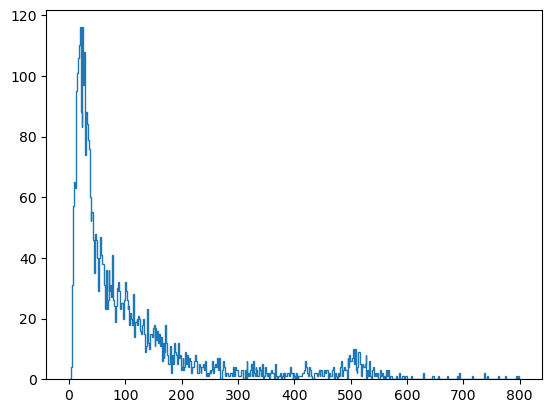

In [7]:
twomutwoe_mask = two_electrons_mask & two_muons_mask

muon_dark_photon_p4 = muon_p4[twomutwoe_mask]
electron_dark_photon_p4 = electron_p4[twomutwoe_mask]

muon_dark_photon_zerop4 = muon_dark_photon_p4[:, 0]
muon_dark_photon_onep4 = muon_dark_photon_p4[:, 1]
electron_dark_photon_zerop4 = electron_dark_photon_p4[:, 0]
electron_dark_photon_onep4 = electron_dark_photon_p4[:, 1]

boundstate_sum_p4 = muon_dark_photon_zerop4 + muon_dark_photon_onep4 + electron_dark_photon_zerop4 + electron_dark_photon_onep4

plt.hist((boundstate_sum_p4.mass), bins=500, range=(0, 800),histtype='step', label="bound state mass")

The code above created a histogram of the mass of a dark matter bound state. In the SIDM Model of Dark Matter, it is capable of forming a bound state between molecular dark matter. This decays into two dark photons, which each decay into two leptons.

In this example, two muons and two electrons were the leptons decayed. The masks used before filtered events that had two muons and two electrons. When the masses of the leptons are added, the mass of two dark photons is outputed, which is equal to the mass of the bound state.

Mass is the collider is measured by energy. This is possible because of Einstein's equation that Energy is related to mass. The histogram shows the number of events that have the sum of four leptons at each energy level. The "bump" at about 500GeV is non-standard, so it can be concluded that the Dark Matter bound-state has a mass of 500GeV.

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.75150060e-06, 3.75150060e-06, 3.75150060e-06, 1.12545018e-05,
        3.75150060e-06, 0.00000000e+00, 7.50300120e-06, 3.75150060e-06,
        3.75150060e-06, 1.12545018e-05, 1.87575030e-05, 1.50060024e-05,
        1.50060024e-05, 1.87575030e-05, 7.50300120e-06, 3.00120048e-05,
        1.87575030e-05, 3.37635054e-05, 4.50180072e-05, 1.87575030e-05,
        4.50180072e-05, 3.37635054e-05, 4.87695078e-05, 4.50180072e-05,
        7.50300120e-05, 4.87695078e-05, 3.37635054e-05, 7.12785114e-05,
        9.37875150e-05, 9.37875150e-05, 1.05042017e-04, 1.98829532e-04,
        1.61314526e-04, 1.20048019e-04, 1.91326531e-04, 2.551020

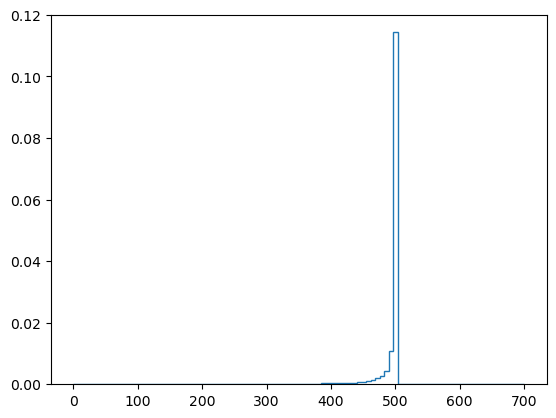

In [8]:
gen_p4 = vector.zip({"px": branches['gen_p4.fCoordinates.fX'], 
                      "py": branches['gen_p4.fCoordinates.fY'], 
                      "pz": branches['gen_p4.fCoordinates.fZ'], 
                      "t": branches['gen_p4.fCoordinates.fT']}  )

gen_ele_mask=abs(branches["gen_pid"])==11
gen_mu_mask=abs(branches["gen_pid"])==13

ele_p4 = gen_p4[gen_ele_mask]
mu_p4 = gen_p4[gen_mu_mask]

boundstate_p4 = ele_p4[:, 0] + ele_p4[:, 1] + mu_p4[:, 0] + mu_p4[:, 1]

plt.hist((boundstate_p4.mass), bins=100, range=(0, 700),histtype='step', label="bound state mass", density=True)

All the arrays used for these histograms are simulations of what SIDM would look like in a sensor. Within the ntuple, there is a series of arrays that contain just the dark matter that was generated, without other backgrounds or sensor errors. Using this raw data, it is possible to "check" the conclusion from the previous histogram, that the boundstate exists at 500GeV.

Following a similar method to the previous bound-state histogram, but now with the generated arrays, the result is the histgoram above. The spike at 500GeV affirms that previous conclusion.